<a href="https://colab.research.google.com/github/yosephhabtu/DATA205/blob/main/DATA205_Capstone_Project_Data_Ingestion_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Ingestion and Preparation

### U.S. Bioenergy Statistics - USDA

In [2]:
# Loading the USDA Bioenergy Statistics dataset into a DataFrame
us_bio = pd.read_csv('US_Bioenergy_Statistics.csv')

# Previewing the DataFrame (first 5 rows)
us_bio.head()

,table,table_name,year,year_cat,year_desc,period,period_cat,period_desc,geographic_level,location,commodity,data_item,data_item_desc,units,value
0,1.0,Fuel ethanol supply and disappearance and grai...,1980,Marketing,Corn marketing year (Sep-Aug),2,Marketing year quarter,Q2 Dec-Feb,Country,United States,Fuel ethanol,Consumption,NaN,"1,000 gallons",13428.450
1,1.0,Fuel ethanol supply and disappearance and grai...,1980,Marketing,Corn marketing year (Sep-Aug),2,Marketing year quarter,Q2 Dec-Feb,Country,United States,Fuel ethanol,Production,NaN,"1,000 gallons",13428.450
2,1.0,Fuel ethanol supply and disappearance and grai...,1980,Marketing,Corn marketing year (Sep-Aug),3,Marketing year quarter,Q3 Mar-May,Country,United States,Fuel ethanol,Consumption,NaN,"1,000 gallons",20939.268
3,1.0,Fuel ethanol supply and disappearance and grai...,1980,Marketing,Corn marketing year (Sep-Aug),3,Marketing year quarter,Q3 Mar-May,Country,United States,Fuel ethanol,Production,NaN,"1,000 gallons",20939.268
4,1.0,Fuel ethanol supply and disappearance and grai...,1980,Marketing,Corn marketing year (Sep-Aug),4,Marketing year quarter,Q4 Jun-Aug,Country,United States,Fuel ethanol,Consumption,NaN,"1,000 gallons",20939.268


In [3]:
#  Displaying a summary of the DataFrame, including the data types of each column
us_bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14604 entries, 0 to 14603
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   table             14604 non-null  float64
 1   table_name        14604 non-null  object 
 2   year              14604 non-null  int64  
 3   year_cat          14604 non-null  object 
 4   year_desc         14604 non-null  object 
 5   period            14604 non-null  int64  
 6   period_cat        14604 non-null  object 
 7   period_desc       14604 non-null  object 
 8   geographic_level  14602 non-null  object 
 9   location          14602 non-null  object 
 10  commodity         14604 non-null  object 
 11  data_item         14604 non-null  object 
 12  data_item_desc    4902 non-null   object 
 13  units             14604 non-null  object 
 14  value             14604 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [4]:
# Summarizing the number of missing values in each column
print(us_bio.isna().sum())

table                  0
table_name             0
year                   0
year_cat               0
year_desc              0
period                 0
period_cat             0
period_desc            0
geographic_level       2
location               2
commodity              0
data_item              0
data_item_desc      9702
units                  0
value                  0
dtype: int64


In [5]:
# Taking a look at the rows where the 'location' value is missing
us_bio[us_bio['location'].isna()]

,table,table_name,year,year_cat,year_desc,period,period_cat,period_desc,geographic_level,location,commodity,data_item,data_item_desc,units,value
8811,7.0,Oils and fats supply and prices,2023,Marketing,Sunflower seed oil marketing year (Oct-Sep),2023,Marketing year,Sunflower seed oil marketing year (Oct-Sep),NaN,NaN,Sunflower seed oil,Price,Price for sunflower seed oil. See most recent ...,Cents per pound,58.65
8824,7.0,Oils and fats supply and prices,2024,Marketing,Sunflower seed oil marketing year (Oct-Sep),2024,Marketing year,Sunflower seed oil marketing year (Oct-Sep),NaN,NaN,Sunflower seed oil,Price,Price for sunflower seed oil. See most recent ...,Cents per pound,63.00


Given that location/geographic scale is relevant to the project's analyses and cannot be intuitively imputed, these rows must be removed from the DataFrame.

In [6]:
# Dropping missing values located in the 'location' column
    # This will also drop missing values from the 'geographic_level' column as it is associated with the 'location' column
us_bio.dropna(subset=['location'], inplace=True)
print(us_bio.isna().sum())

table                  0
table_name             0
year                   0
year_cat               0
year_desc              0
period                 0
period_cat             0
period_desc            0
geographic_level       0
location               0
commodity              0
data_item              0
data_item_desc      9702
units                  0
value                  0
dtype: int64


The `data_item_desc` column will remain unchanged as there is logical reasoning behind the missing values in this column:

* The associated `data_item` column provides a categorical description of what the `value` column represents (e.g., "Price")
*   The `data_item_desc` column provides details in addition to those given by the `data_item` column (e.g, "Price for edible corn oil"), which is not applicable for every record



### Construction Cost Data For Electric Generators by Major Energy Source - EIA

In [7]:
# Loading the 2013-2022 EIA Construction Cost datasets into one combined DataFrame
generators_data = []
for year in range(2013, 2023):
    df = pd.read_excel(f'generator_costs_{year}.xlsx', sheet_name='Table1')
    df['Year'] = pd.Series([year] * len(df)) # Adding a column for the year of the data
    generators_data.append(df)

generators_df = pd.concat(generators_data, ignore_index=True)
generators_df.head()

,Energy Source,Average Construction Cost ($/kilowatt of installed nameplate capacity),Total Construction Cost (thousand $),Total Capacity (MW),Average New Capacity (MW),Total Number of Plants,Total Number of Generators,Year
0,Natural gas,965.116260,7152476.6,7411.0,176.452381,42,86,2013
1,Solar photovoltaic,3704.703486,9756707.1,2633.6,13.102488,201,250,2013
2,Wind,1895.226982,1628189.5,859.1,57.273333,15,22,2013
3,Biomass,3494.885318,2794510.3,799.6,12.692063,63,105,2013
4,Hydro,2294.489497,972175.2,423.7,22.300000,19,21,2013


Note: The Excel files for the EIA Construction Cost datasets were each edited in Excel before loading into this juypter notebook. More specifically, a new sheet named "Table1" was added to each file, containing the data of interest in a simpler tabular format. This was only done to minimize format cleaning after data ingestion. No changes were made to the original data.

In [8]:
# Changing Total Construction Cost units to $ and Average Construction Cost units to $/MW, in order to establish consistent units across datasets
generators_df['Total Construction Cost ($)'] = generators_df['Total Construction Cost (thousand $)'] * 1000
generators_df['Average Construction Cost ($/MW)'] = generators_df['Total Construction Cost ($)'] / generators_df['Total Capacity (MW)']
generators_df.drop(['Average Construction Cost ($/kilowatt of installed nameplate capacity)', 'Total Construction Cost (thousand $)'], axis=1, inplace=True)
display(generators_df.head())
generators_df.info()

,Energy Source,Total Capacity (MW),Average New Capacity (MW),Total Number of Plants,Total Number of Generators,Year,Total Construction Cost ($),Average Construction Cost ($/MW)
0,Natural gas,7411.0,176.452381,42,86,2013,7.152477e+09,9.651163e+05
1,Solar photovoltaic,2633.6,13.102488,201,250,2013,9.756707e+09,3.704703e+06
2,Wind,859.1,57.273333,15,22,2013,1.628190e+09,1.895227e+06
3,Biomass,799.6,12.692063,63,105,2013,2.794510e+09,3.494885e+06
4,Hydro,423.7,22.300000,19,21,2013,9.721752e+08,2.294489e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Energy Source                     62 non-null     object 
 1   Total Capacity (MW)               62 non-null     float64
 2   Average New Capacity (MW)         62 non-null     float64
 3   Total Number of Plants            62 non-null     int64  
 4   Total Number of Generators        62 non-null     int64  
 5   Year                              62 non-null     int64  
 6   Total Construction Cost ($)       62 non-null     float64
 7   Average Construction Cost ($/MW)  62 non-null     float64
dtypes: float64(4), int64(3), object(1)
memory usage: 4.0+ KB


In [9]:
# Displaying the distinct energy sources and their number of occurences in the dataset
generators_df['Energy Source'].value_counts()

,count
Energy Source,
Natural gas,10
Wind,10
Petroleum liquids,10
Battery storage,8
Biomass,8
Solar,7
Hydro,5
Solar PV,2
Solar photovoltaic,1


In [10]:
# Categorizing all solar-related sources under a single category
for source in ['Solar photovoltaic', 'Solar PV']: # Solar PV = Solar photovoltaic
    generators_df['Energy Source'] = generators_df['Energy Source'].str.replace(source, 'Solar')

generators_df['Energy Source'].value_counts()

,count
Energy Source,
Natural gas,10
Solar,10
Wind,10
Petroleum liquids,10
Biomass,8
Battery storage,8
Hydro,5
Geothermal,1


### Greenhouse Gas Emissions by Fuel Source - EPA

In [11]:
# Loading the EPA emissions data
emissions_by_fuel = pd.read_excel('emissions_by_unit_and_fuel_type_c_d_aa.xlsx', sheet_name='FUEL_DATA')

In [12]:
# Cleaning the format of the data post-ingestion (the original file has several rows of background information above the data)
emissions_by_fuel = emissions_by_fuel.iloc[4:].reset_index(drop=True)
emissions_by_fuel.columns = emissions_by_fuel.iloc[0]
emissions_by_fuel = emissions_by_fuel.drop(0).reset_index(drop=True)
display(emissions_by_fuel.head())
emissions_by_fuel.info()

,Facility Id,FRS Id,Facility Name,City,State,Primary NAICS Code,Reporting Year,Industry Type (subparts),Industry Type (sectors),Unit Name,General Fuel Type,Specific Fuel Type,Other Fuel Name,Blend Fuel Name,Fuel Methane (CH4) emissions (mt CO2e),Fuel Nitrous Oxide (N2O) emissions (mt CO2e)
0,1001155,110000397516,1500 South Tibbs LLC d/b/a Aurorium Indianapol...,Indianapolis,IN,325199,2023,C,Chemicals,GP-1,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,30.5,36.356
1,1001155,110000397516,1500 South Tibbs LLC d/b/a Aurorium Indianapol...,Indianapolis,IN,325199,2023,C,Chemicals,GP-1,Petroleum Products,Naphtha (<401 deg F),NaN,NaN,0,0
2,1012147,NaN,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,211130,2018,"C,NN,W","Natural Gas and Natural Gas Liquids Suppliers,...",CP-03.00,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,1.5,1.788
3,1012147,NaN,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,211130,2018,"C,NN,W","Natural Gas and Natural Gas Liquids Suppliers,...",CP-03.01,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,0,0
4,1012147,NaN,17Z Gas Plant - Chevron USA Inc.,McKittrick,CA,211130,2018,"C,NN,W","Natural Gas and Natural Gas Liquids Suppliers,...",CP-03.02,Natural Gas,Natural Gas (Weighted U.S. Average),NaN,NaN,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323496 entries, 0 to 323495
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Facility Id                                   323496 non-null  object
 1   FRS Id                                        291169 non-null  object
 2   Facility Name                                 323496 non-null  object
 3   City                                          323496 non-null  object
 4   State                                         323496 non-null  object
 5   Primary NAICS Code                            323467 non-null  object
 6   Reporting Year                                323496 non-null  object
 7   Industry Type (subparts)                      323496 non-null  object
 8   Industry Type (sectors)                       323470 non-null  object
 9   Unit Name                                     323496 non-nu

In [13]:
# Changing the data type of the numerical variables (CH4 and N2O emissions) from strings to numbers
for col in ['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']:
    emissions_by_fuel[col] = emissions_by_fuel[col].astype('float')
emissions_by_fuel['Reporting Year'] = emissions_by_fuel['Reporting Year'].astype('int')
emissions_by_fuel.dtypes

,0
0,
Facility Id,object
FRS Id,object
Facility Name,object
City,object
State,object
Primary NAICS Code,object
Reporting Year,int64
Industry Type (subparts),object
Industry Type (sectors),object


In [14]:
# Viewiing a summary of the missing values
emissions_by_fuel.isna().sum()

,0
0,
Facility Id,0
FRS Id,32327
Facility Name,0
City,0
State,0
Primary NAICS Code,29
Reporting Year,0
Industry Type (subparts),0
Industry Type (sectors),26


In [15]:
# Dropping rows where both the General Fuel Type and Specific Fuel Type are missing
general_and_specific_na = emissions_by_fuel[(emissions_by_fuel['General Fuel Type'].isna()) & (emissions_by_fuel['Specific Fuel Type'].isna())]
emissions_by_fuel.drop(index=general_and_specific_na.index, inplace=True)
emissions_by_fuel.isna().sum()

,0
0,
Facility Id,0
FRS Id,32327
Facility Name,0
City,0
State,0
Primary NAICS Code,29
Reporting Year,0
Industry Type (subparts),0
Industry Type (sectors),26


In [16]:
# Taking a look at the remaining rows where the General Fuel Type is missing
emissions_by_fuel[emissions_by_fuel['General Fuel Type'].isna()]

,Facility Id,FRS Id,Facility Name,City,State,Primary NAICS Code,Reporting Year,Industry Type (subparts),Industry Type (sectors),Unit Name,General Fuel Type,Specific Fuel Type,Other Fuel Name,Blend Fuel Name,Fuel Methane (CH4) emissions (mt CO2e),Fuel Nitrous Oxide (N2O) emissions (mt CO2e)
58891,1002708,110040999792,CLEARWATER PAPER CORP-CYPRESS BEND MILL,ARKANSAS CITY,AR,322130,2012,"AA,C,TT","Pulp and Paper, Waste",#1 Lime Kiln,NaN,Coke,NaN,NaN,0.50,0.894
143481,1002113,110043808742,International Paper - Pine Hill Mill,PINE HILL,AL,322130,2012,"AA,C,TT","Pulp and Paper, Waste",LK1,NaN,Coke,NaN,NaN,14.50,0.000
143493,1002113,110043808742,International Paper - Pine Hill Mill,PINE HILL,AL,322130,2011,"AA,C,TT","Pulp and Paper, Waste",LK1,NaN,Coke,NaN,NaN,0.00,0.000
143504,1002113,110043808742,International Paper - Pine Hill Mill,PINE HILL,AL,322130,2010,"AA,C",Pulp and Paper,LK1,NaN,Coke,NaN,NaN,14.25,0.000
143612,1001733,110039166390,International Paper - Red River Mill,CAMPTI,LA,322121,2011,"AA,C,TT","Pulp and Paper, Waste",LK (1224-06-06),NaN,Coke,NaN,NaN,0.00,0.000
143617,1001733,110039166390,International Paper - Red River Mill,CAMPTI,LA,322121,2010,"AA,C",Pulp and Paper,LK (1224-06-06),NaN,Coke,NaN,NaN,15.75,0.000
143867,1006776,110043785455,International Paper - Valliant Mill,VALLIANT,OK,322130,2012,"AA,C,TT","Pulp and Paper, Waste",Lime Kiln (EUG E7),NaN,Coke,NaN,NaN,1125.00,0.000
143879,1006776,110043785455,International Paper - Valliant Mill,VALLIANT,OK,322130,2011,"AA,C,TT","Pulp and Paper, Waste",Lime Kiln (EUG E7),NaN,Coke,NaN,NaN,0.00,0.000
143886,1006776,110043785455,International Paper - Valliant Mill,VALLIANT,OK,322130,2010,"AA,C",Pulp and Paper,Lime Kiln (EUG E7),NaN,Coke,NaN,NaN,13.00,0.000
143982,1000434,110000605220,International Paper - Vicksburg Mill,REDWOOD,MS,322121,2011,"AA,C",Pulp and Paper,LK1 (AA003),NaN,Coke,NaN,NaN,0.00,0.000


It appears that all observations where the General Fuel Type is missing, the Specific Fuel Type is listed as coke. Without context, the term "Coke" is ambiguous as it can refer to petroleum coke or coal coke. However, all of these rows have "Pulp and Paper, Waste" listed as the industry type. After some quick research, it was found that petroleum coke is the most commonly used fuel source in this industry, which makes it reasonable to assume and impute petroleum as the General Fuel Type for these rows.

In [17]:
# Displaying the distinct General Fuel Types in this dataset to know which category to impute the missing values under
emissions_by_fuel['General Fuel Type'].unique()

array(['Natural Gas', 'Petroleum Products', 'Other', 'Coal', 'Fuel Gas',
       'Natural Gas ', nan, 'Biomass', 'Solid Byproducts'], dtype=object)

Natural gas is shown as two distinct general fuel types due to additional whitespace (likely from an entering error). Before imputing the missing values in the `Specific Fuel Type` column, we must remove the whitespace from the `General Fuel Column` (as well as the `Specific Fuel Type`, just to be safe).

In [18]:
# Removing all whitespace from strings in the General Fuel Type and Specific Fuel Type columns
emissions_by_fuel['General Fuel Type'] = emissions_by_fuel['General Fuel Type'].str.strip()
emissions_by_fuel['Specific Fuel Type'] = emissions_by_fuel['Specific Fuel Type'].str.strip()

# Re-checking the distinct General Fuel Types
emissions_by_fuel['General Fuel Type'].unique()

array(['Natural Gas', 'Petroleum Products', 'Other', 'Coal', 'Fuel Gas',
       nan, 'Biomass', 'Solid Byproducts'], dtype=object)

In [19]:
# Imputing "Petroleum Products" as the General Fuel Type for the rows with missing values in this column
emissions_by_fuel.loc[emissions_by_fuel['General Fuel Type'].isna(), 'General Fuel Type'] = 'Petroleum Products'
emissions_by_fuel.isna().sum()

,0
0,
Facility Id,0
FRS Id,32327
Facility Name,0
City,0
State,0
Primary NAICS Code,29
Reporting Year,0
Industry Type (subparts),0
Industry Type (sectors),26


In [20]:
# Displaying the distinct General Fuel Types for rows where the Specific Fuel Type is missing
emissions_by_fuel[emissions_by_fuel['Specific Fuel Type'].isna()]['General Fuel Type'].unique()

array(['Other', 'Natural Gas', 'Fuel Gas', 'Petroleum Products', 'Coal',
       'Solid Byproducts'], dtype=object)

In [21]:
# Dropping all rows where the specific fuel type is missing and general fuel type is listed as "Other", since these rows provide no reliable fuel type info
emissions_by_fuel.drop(index=emissions_by_fuel[(emissions_by_fuel['Specific Fuel Type'].isna()) & (emissions_by_fuel['General Fuel Type'] == 'Other')].index, inplace=True)
emissions_by_fuel.isna().sum()

,0
0,
Facility Id,0
FRS Id,32292
Facility Name,0
City,0
State,0
Primary NAICS Code,29
Reporting Year,0
Industry Type (subparts),0
Industry Type (sectors),26


Although there are still 51 rows with missing values in the `Specific Fuel Type` column, general fuel type is of more interest as the project is not aiming to analyze each specific fuel source. Thus, in the upcoming preprocessing tasks for this dataset, the `Specific Fuel Type` will serve to help categorize observations that have a `General Fuel Type` listed as "Other."

Regarding the other columns with significant missing values (`FRS ID`, `Industry Type (sectors)`, `Other Fuel Name`, `Blend Fuel Name`), since they are not columns of interest for this project, no further rows will be dropped based on those columns (in fact, those columns will later be dropped during preprocessing).

In [22]:
# Viewing the distinct general fuel types in the dataset at its current state
emissions_by_fuel['General Fuel Type'].value_counts()

,count
General Fuel Type,
Natural Gas,185965
Petroleum Products,84968
Other,37185
Coal,15149
Fuel Gas,17
Biomass,2
Solid Byproducts,1


In [23]:
# Viewing the distinct Specific Fuel Type values, filtered for rows in which the General Fuel Type is listed as "Other"
emissions_by_fuel[emissions_by_fuel['General Fuel Type'] == 'Other']['Specific Fuel Type'].unique()

array(['Wood and Wood Residuals (dry basis)', 'Wood and Wood Residuals',
       'Coke Oven Gas', 'Other Biomass Gases',
       'Biogas (Captured methane)', 'Agricultural Byproducts', 'Fuel Gas',
       'Landfill Gas', 'Solid Byproducts', 'Tires', 'spent liquor solids',
       'Blast Furnace Gas', 'Municipal Solid Waste',
       'Rendered Animal Fat', 'Biodiesel (100%)', 'Vegetable Oil',
       'Plastics', 'Biodiesel', 'Ethanol', 'Mixed (Industrial sector)',
       'Anthracite'], dtype=object)

In [24]:
# Selecting and dropping the rows in which the General Fuel Type cannot be determined
ambiguous = emissions_by_fuel[(emissions_by_fuel['General Fuel Type'].isin(['Other', 'Solid Byproducts'])) &
 (emissions_by_fuel['Specific Fuel Type'].isin(['Solid Byproducts', 'Mixed (Industrial sector)']) |
  emissions_by_fuel['Specific Fuel Type'].isna())]
emissions_by_fuel.drop(ambiguous.index, inplace=True)

Criteria for ambiguity:
* General Fuel Type is listed as one of the following:
    * "Other"
    * "Solid Byproducts"
        * Solid byproducts is an ambiguous term that can refer to various waste materials, including those derived from either biomass or fossil fuels. Without additional context, the fuel type cannot be determined.

AND

* Specific Fuel Type is listed as one of the following:
    * "Solid Byproducts"
    * "Mixed (Industrial sector)"
        * "Mixed" implies multiple fuel types, which makes it an useable category for a project analyzing distinct energy sources
    * NaN (missing)

In [25]:
# Creating a dictionary to reclassify fuels that have a General Fuel Type listed as "Other", based on their Specific Fuel Types and Industry Types (sectors)
fuel_type_map = {
    # Biomass-related fuels
    'Wood and Wood Residuals (dry basis)': 'Biomass',
    'Wood and Wood Residuals': 'Biomass',
    'Other Biomass Gases': 'Biomass',
    'Biogas (Captured methane)': 'Biomass',
    'Agricultural Byproducts': 'Biomass',
    'Landfill Gas': 'Biomass',
    'spent liquor solids': 'Biomass',
    'Municipal Solid Waste': 'Biomass', # Only if Industry Type = Power Plants or Waste
    'Rendered Animal Fat': 'Biomass',
    'Biodiesel (100%)': 'Biomass',
    'Vegetable Oil': 'Biomass',
    'Biodiesel': 'Biomass',
    'Ethanol': 'Biomass',

    # Fossil fuel-related
    'Coke Oven Gas': 'Coal',
    'Fuel Gas': 'Fuel Gas',
    'Tires': 'Petroleum Products',
    'Blast Furnace Gas': 'Fuel Gas',
    'Plastics': 'Petroleum Products',
    'Anthracite': 'Coal'
}

### Fuel Mapping Explanations/Reasonings


---


Fuels Reclassified to Biomass:
* Wood and Wood Residuals / Wood and Wood Residuals (dry basis): Common biomass-derived fuels.
* Other Biomass Gases: 'Biomass' is in the name; likely methane/biomethane from biological sources.
* Biogas (Captured methane): Renewable gas from organic material.
* Agricultural Byproducts: Organic waste from farming or food production.
* Landfill Gas: Captured methane from waste decomposition.
* Spent Liquor Solids: Biomass waste product from pulping; commonly used as a biomass fuel in paper mills.
* Municipal Solid Waste: Includes both biogenic and fossil-based materials, however, those that are used as a fuel source (e.g., waste-to-energy incinerators) are derived from biomass; consistent with EIA and EPA definitions in electricity sector reports.
    * Since the classification of municipal solid waste is conditional, only rows (facilities) where the Industry Type (sector) has "Power Plants" or "Waste" in its description will be classified as "Biomass" for the General Fuel Type, as those are most likely to be waste-to-energy facilities. Rows that do not meet these conditions will be dropped, since other industry types could be using municipal solid waste as either a biomass or fossil fuel source.
* Rendered Animal Fat: Often used as feedstock for biodiesel production.
* Biodiesel / Biodiesel (100%): Bio-based fuel.
* Vegetable Oil: Often used as a feedstock in biofuels.
* Ethanol: Major biofuel.


---


Fuels Reclassfied to Fossil Fuel Sources:

Reclassified to Coal:
* Coke Oven Gas: Byproduct of coal processing.
* Anthracite: Specific type of coal.

Reclassified to Petroleum Products:
* Tires: Made from petroleum-based products (e.g., synthetic rubber, oils).
* Plastics: Petroleum-derived material.

Reclassified to Fuel Gas:
* Fuel Gas: Generic term for low-Btu gaseous fossil fuel byproducts; matches existing "Fuel Gas" General Fuel type and industry context.
* Blast Furnace Gas: Although it is a byproduct of coal-based processing, it behaves like a gaseous fuel and is often grouped with other low-Btu gases in EIA electricity generation datasets.

In [26]:
# Iterating through each row and using the fuel reclassification map to assign new values for General Fuel Types listed as "Other"
    # Including the special conditions for the "Municipal Solid Waste" to "Biomass" reclassification
for idx, row in emissions_by_fuel.iterrows():
    general = row['General Fuel Type']
    specific  = row['Specific Fuel Type']
    if general == 'Other' and specific in fuel_type_map:
        if specific != 'Municipal Solid Waste':
            emissions_by_fuel.loc[idx, 'General Fuel Type'] = fuel_type_map[specific]
        else:
            if any([x in row['Industry Type (sectors)'] for x in ['Power Plants', 'Waste']]):
                emissions_by_fuel.loc[idx, 'General Fuel Type'] = fuel_type_map[specific]
            else:
                emissions_by_fuel.drop(idx, inplace=True)

In [27]:
# Renaming "Petroleum Products" to "Petroleum" to maintain consistent fuel source naming across datasets
emissions_by_fuel['General Fuel Type'] = emissions_by_fuel['General Fuel Type'].str.replace('Petroleum Products', 'Petroleum')
emissions_by_fuel['General Fuel Type'].value_counts()

,count
General Fuel Type,
Natural Gas,185965
Petroleum,85859
Fuel Gas,21245
Coal,15908
Biomass,13764


In [28]:
# Subsetting the DataFrame to only include the columns of interest
emissions_by_fuel = emissions_by_fuel[['State',
                                       'Reporting Year',
                                       'General Fuel Type',
                                       'Fuel Methane (CH4) emissions (mt CO2e)',
                                       'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']]

# Renaming the columns for easier referencing
emissions_by_fuel.rename(columns={'Reporting Year': 'Year',
                                  'General Fuel Type': 'Fuel Type',
                                  'Fuel Methane (CH4) emissions (mt CO2e)': 'CH4',
                                  'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)': 'N2O'},
                         inplace=True)

# Reshaping the DataFrame so that emissions can be grouped by greenhouse gas type (CH4/N2O)
emissions_by_fuel = emissions_by_fuel.melt(id_vars=['State', 'Year', 'Fuel Type'],
                                           value_vars=['CH4', 'N2O'],
                                           var_name='GHG Type',
                                           value_name='Emissions (MTCO2e)')

print(emissions_by_fuel.info())
display(emissions_by_fuel.describe())

<ipython-input-28-40f479647855>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emissions_by_fuel.rename(columns={'Reporting Year': 'Year',


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645482 entries, 0 to 645481
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               645482 non-null  object 
 1   Year                645482 non-null  int64  
 2   Fuel Type           645482 non-null  object 
 3   GHG Type            645482 non-null  object 
 4   Emissions (MTCO2e)  645482 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 24.6+ MB
None


,Year,Emissions (MTCO2e)
count,645482.000000,645482.000000
mean,2016.745279,260.054080
std,3.766853,1659.278087
min,2010.000000,0.000000
25%,2013.000000,0.000000
50%,2017.000000,2.750000
75%,2020.000000,24.750000
max,2023.000000,141043.400000


The final DataFrame now contains no missing values and all ambiguous or unclear values (e.g., "Other", "Solid Byproducts", "Mixed (Industrial sector)", NaN) were either reclassified or removed. The `Specific Fuel Type` column is no longer relevant as the `General Fuel Type` column has been cleaned and minimized to five distinct categories: Natural Gas, Petroleum, Fuel Gas, Coal, and Biomass.

### Electricity Generation by Energy Source - EIA

In [73]:
# Loading the data of electricity generation by major source (renewable and nonrenewable, excluding biomass)
# Cleaning the format of the data post-ingestion and selecting the columns of interest
elec_gen_all = pd.read_excel('table_1_01.xlsx', header=None)
elec_gen_all = elec_gen_all.iloc[3:16, :]
elec_gen_all = elec_gen_all.drop(elec_gen_all.columns[9:], axis=1).reset_index(drop=True)
elec_gen_all.columns = elec_gen_all.iloc[0]
elec_gen_all = elec_gen_all.drop([0, 1]).reset_index(drop=True)
elec_gen_all.columns = elec_gen_all.columns.str.replace('\n', ' ')
elec_gen_all

,Period,Coal,Petroleum Liquids,Petroleum Coke,Natural Gas,Other Fossil Gas,Nuclear,Hydroelectric Conventional,Solar
0,2014,1581710,18276,11955,1126635,12022,797166,259367,17691
1,2015,1352398,17372,10877,1334668,13117,797178,249080,24893
2,2016,1239149,13008,11197,1379271,12807,805694,267812,36054
3,2017,1205835,12414,8976,1297703,12469,804950,300333,53287
4,2018,1149487,16245,8981,1471843,13463,807084,292524,63825
5,2019,964957,11522,6819,1588533,12591,809409,287874,71937
6,2020,773393,9662,7679,1626790,11818,789879,285274,89199
7,2021,897999,11663,7511,1579190,11397,779645,251585,115258
8,2022,831512,15805,7126,1687065,11722,771537,254789,143792
9,2023,675115,11397,4836,1806063,11778,774873,245002,165530


In [74]:
# Inspecting the data types of each column
print(elec_gen_all.dtypes)

0
Period                        object
Coal                          object
Petroleum Liquids             object
Petroleum Coke                object
Natural Gas                   object
Other Fossil Gas              object
Nuclear                       object
Hydroelectric Conventional    object
Solar                         object
dtype: object


In [75]:
# Correcting the data type of the numeric columns
for col in elec_gen_all.columns:
    elec_gen_all[col] = elec_gen_all[col].astype('int')

In [76]:
# Combining Petroleum sources into one category
elec_gen_all['Petroleum'] = elec_gen_all['Petroleum Liquids'] + elec_gen_all['Petroleum Coke']
elec_gen_all.drop(['Petroleum Liquids', 'Petroleum Coke'], axis=1, inplace=True)
elec_gen_all.head()

,Period,Coal,Natural Gas,Other Fossil Gas,Nuclear,Hydroelectric Conventional,Solar,Petroleum
0,2014,1581710,1126635,12022,797166,259367,17691,30231
1,2015,1352398,1334668,13117,797178,249080,24893,28249
2,2016,1239149,1379271,12807,805694,267812,36054,24205
3,2017,1205835,1297703,12469,804950,300333,53287,21390
4,2018,1149487,1471843,13463,807084,292524,63825,25226


In [77]:
# Loading the renewable energy data (includes biomass)
elec_gen_ren = pd.read_excel('table_1_01_a.xlsx', sheet_name='Table1')
elec_gen_ren

,Period,Wind,Solar Photovoltaic,Solar Thermal,Wood and Wood-Derived Fuels,Landfill Gas,Biogenic Municipal Solid Waste,Other Waste Biomass,Geothermal,Conventional Hydroelectric,Total Renewable Generation at Utility Scale Facilities
0,2014,181655,15250,2441,42340,11220,7228,3202,15877,259367,538579
1,2015,190719,21666,3227,41929,11291,7211,3201,15918,249080,544241
2,2016,226993,32670,3384,40947,11218,7265,3331,15826,267812,609445
3,2017,254303,50018,3269,41124,11543,6951,3115,15927,300333,686583
4,2018,272667,60234,3592,40936,11036,7136,2724,15967,292524,706816
5,2019,295882,68719,3218,38543,10468,6093,2402,15473,287874,728673
6,2020,337938,86066,3133,36219,10212,6080,2201,15890,285274,783012
7,2021,378197,112335,2924,36463,9421,6101,2267,15975,251585,815267
8,2022,434297,140793,2999,35466,8535,5776,2073,16087,254789,900814
9,2023,421141,162683,2847,31615,7935,5568,2082,16367,245002,895241


Note: Like the EIA Construction Cost datasets, this file was edited in Excel before loading into the jupyter notebook by adding a new sheet ("Table1") that stores the data of interest in a simpler tabular format to minimize format cleaning after data ingestion. No changes were made to the original data.

In [78]:
# Inspecting the data types of the columns
print(elec_gen_ren.dtypes)

Period                                                    int64
Wind                                                      int64
Solar Photovoltaic                                        int64
Solar Thermal                                             int64
Wood and Wood-Derived Fuels                               int64
Landfill Gas                                              int64
Biogenic Municipal Solid Waste                            int64
Other Waste Biomass                                       int64
Geothermal                                                int64
Conventional Hydroelectric                                int64
Total Renewable Generation at Utility Scale Facilities    int64
dtype: object


In [79]:
# Dropping the columns that also exist in the elec_gen_all DataFrame (as well the total renewable generation column)
elec_gen_ren.drop(['Solar Photovoltaic',
                   'Solar Thermal',
                   'Conventional Hydroelectric',
                   'Total Renewable Generation at Utility Scale Facilities'],
                  axis=1,
                  inplace=True)

# Merging both DataFrames into one that contains both renewable and nonrewable energy sources, including biomass
elec_gen_all = elec_gen_all.merge(elec_gen_ren, on='Period')
elec_gen_all.head()

,Period,Coal,Natural Gas,Other Fossil Gas,Nuclear,Hydroelectric Conventional,Solar,Petroleum,Wind,Wood and Wood-Derived Fuels,Landfill Gas,Biogenic Municipal Solid Waste,Other Waste Biomass,Geothermal
0,2014,1581710,1126635,12022,797166,259367,17691,30231,181655,42340,11220,7228,3202,15877
1,2015,1352398,1334668,13117,797178,249080,24893,28249,190719,41929,11291,7211,3201,15918
2,2016,1239149,1379271,12807,805694,267812,36054,24205,226993,40947,11218,7265,3331,15826
3,2017,1205835,1297703,12469,804950,300333,53287,21390,254303,41124,11543,6951,3115,15927
4,2018,1149487,1471843,13463,807084,292524,63825,25226,272667,40936,11036,7136,2724,15967


In [80]:
# Adding a column summarizing all fossil fuel sources
elec_gen_all['All Fossil Fuels'] = elec_gen_all.loc[:, ['Coal', 'Natural Gas', 'Other Fossil Gas', 'Petroleum']].sum(axis=1)

# Adding a column summarizing all biomass sources
elec_gen_all['All Biomass'] = elec_gen_all.loc[:, ['Wood and Wood-Derived Fuels', 'Landfill Gas', 'Biogenic Municipal Solid Waste', 'Other Waste Biomass']].sum(axis=1)
elec_gen_all.head()

# Renaming the 'Period' column to 'Year' to maximize consistency of variable names across datasets
elec_gen_all.rename(columns={'Period': 'Year'}, inplace=True)

# Reshaping the DataFrame so that the data can be grouped by energy source
elec_gen_all = elec_gen_all.melt(id_vars=['Year'], var_name='Source', value_name='Electricity Generation')
elec_gen_all

,Year,Source,Electricity Generation
0,2014,Coal,1581710
1,2015,Coal,1352398
2,2016,Coal,1239149
3,2017,Coal,1205835
4,2018,Coal,1149487
...,...,...,...
145,2019,All Biomass,57506
146,2020,All Biomass,54712
147,2021,All Biomass,54252
148,2022,All Biomass,51850


### Primary Energy Consumption by Source - EIA

In [37]:
# Loading the data, cleaning the format post-ingestion, and selecting the columns of interest (i.e. relating to fossil fuels or bioenergy)
energy_con = pd.read_excel('Table_1.3_Primary_Energy_Consumption_by_Source.xlsx', sheet_name='Annual Data', header=None)
energy_con = energy_con.iloc[10:].drop(11).reset_index(drop=True)
energy_con.columns = energy_con.iloc[0]
energy_con.rename(columns={'Annual Total': 'Year'}, inplace=True)
energy_con = energy_con.drop(0).reset_index(drop=True)
energy_con.drop(energy_con.columns[-2:], axis=1, inplace=True)
energy_con.head()

,Year,Coal Consumption,Natural Gas Consumption (Excluding Supplemental Gaseous Fuels),Petroleum Consumption (Excluding Biofuels),Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Hydroelectric Power Consumption,Geothermal Energy Consumption,Solar Energy Consumption,Wind Energy Consumption,Biomass Energy Consumption
0,1949,11.980905,5.145142,11.868994,28.988371,0,0.323365,Not Available,Not Available,Not Available,1.549262
1,1950,12.347109,5.968371,13.298283,31.614755,0,0.344218,Not Available,Not Available,Not Available,1.562307
2,1951,12.552996,7.048518,14.407674,33.987736,0,0.356131,Not Available,Not Available,Not Available,1.534669
3,1952,11.306479,7.549621,14.933895,33.778116,0,0.374325,Not Available,Not Available,Not Available,1.474369
4,1953,11.372684,7.906645,15.531959,34.802286,0,0.374015,Not Available,Not Available,Not Available,1.418601


In [38]:
# Replacing values reported as "Not Available" with NaNs
energy_con.replace('Not Available', np.nan, inplace=True)
energy_con.head()

<ipython-input-38-7cbc929e6b2a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  energy_con.replace('Not Available', np.nan, inplace=True)


,Year,Coal Consumption,Natural Gas Consumption (Excluding Supplemental Gaseous Fuels),Petroleum Consumption (Excluding Biofuels),Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Hydroelectric Power Consumption,Geothermal Energy Consumption,Solar Energy Consumption,Wind Energy Consumption,Biomass Energy Consumption
0,1949,11.980905,5.145142,11.868994,28.988371,0.0,0.323365,NaN,NaN,NaN,1.549262
1,1950,12.347109,5.968371,13.298283,31.614755,0.0,0.344218,NaN,NaN,NaN,1.562307
2,1951,12.552996,7.048518,14.407674,33.987736,0.0,0.356131,NaN,NaN,NaN,1.534669
3,1952,11.306479,7.549621,14.933895,33.778116,0.0,0.374325,NaN,NaN,NaN,1.474369
4,1953,11.372684,7.906645,15.531959,34.802286,0.0,0.374015,NaN,NaN,NaN,1.418601


In [39]:
# Displaying a summary of the missing values in the DataFrame
energy_con.isna().sum()

,0
0,
Year,0
Coal Consumption,0
Natural Gas Consumption (Excluding Supplemental Gaseous Fuels),0
Petroleum Consumption (Excluding Biofuels),0
Total Fossil Fuels Consumption,0
Nuclear Electric Power Consumption,0
Hydroelectric Power Consumption,0
Geothermal Energy Consumption,11
Solar Energy Consumption,35


After a quick inspection of the original Excel file, it was found that consumption values reported as "Not Available" are concentrated in the early years (pre-1983) of the dataset's timeframe, specifically for the following energy sources: Geothermal, Solar, and Wind. This suggests that the values were not recorded because these sources were not in widespread commercial use at the time and/or their consumption was too minimal to be measured or reported. Therefore, since these values likely reflect no or negligible consumption, they will be imputed with `0`.

In [40]:
# Inspecting the data types of the columns before imputation
print(energy_con.dtypes)

0
Year                                                                int64
Coal Consumption                                                  float64
Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)    float64
Petroleum Consumption (Excluding Biofuels)                        float64
Total Fossil Fuels Consumption                                    float64
Nuclear Electric Power Consumption                                float64
Hydroelectric Power Consumption                                   float64
Geothermal Energy Consumption                                     float64
Solar Energy Consumption                                          float64
Wind Energy Consumption                                           float64
Biomass Energy Consumption                                        float64
dtype: object


In [41]:
# Correcting the data type of the Year column
energy_con['Year'] = energy_con['Year'].astype('int')

# Imputing missing values with 0
energy_con.fillna(0, inplace=True)

# Verifying the imputation
energy_con.isna().sum()

,0
0,
Year,0
Coal Consumption,0
Natural Gas Consumption (Excluding Supplemental Gaseous Fuels),0
Petroleum Consumption (Excluding Biofuels),0
Total Fossil Fuels Consumption,0
Nuclear Electric Power Consumption,0
Hydroelectric Power Consumption,0
Geothermal Energy Consumption,0
Solar Energy Consumption,0


In [42]:
# Checking the differences between the reported and calculated totals of fossil fuel consumption for the first 5 rows of the dataset
for row in range(5):
    reported = energy_con.iloc[row, 4]
    calculated = energy_con.iloc[row, 1:4].sum()
    diff = np.abs(reported - calculated)

    print('Reported Total:', reported)
    print('Actual Total:', calculated)
    print('Diff:', diff, '\n')

Reported Total: 28.988371
Actual Total: 28.995041
Diff: 0.006669999999999732 

Reported Total: 31.614755
Actual Total: 31.613763
Diff: 0.000992000000000104 

Reported Total: 33.987736
Actual Total: 34.009188
Diff: 0.02145200000000358 

Reported Total: 33.778116
Actual Total: 33.789995
Diff: 0.011879000000000417 

Reported Total: 34.802286
Actual Total: 34.811288000000005
Diff: 0.009002000000002397 



It was found that the `Total Fossil Fuels Consumption` column did not provide exact totals of consumption for the various fossil fuel sources (coal, natural gas, petroleum). Although the differences between the calculated sums and the reported sums are minimal (and likely be due to a data entering error), the calculated sums of the coal, natural gas, and petroleum consumption columns will be used to ensure consistency and accuracy.

In [43]:
# Changing the reported values in the Total Fossil Fuels Consumption column to the calculated totals
energy_con['Total Fossil Fuels Consumption'] = energy_con.iloc[:, 1:4].sum(axis=1)
energy_con.head()

,Year,Coal Consumption,Natural Gas Consumption (Excluding Supplemental Gaseous Fuels),Petroleum Consumption (Excluding Biofuels),Total Fossil Fuels Consumption,Nuclear Electric Power Consumption,Hydroelectric Power Consumption,Geothermal Energy Consumption,Solar Energy Consumption,Wind Energy Consumption,Biomass Energy Consumption
0,1949,11.980905,5.145142,11.868994,28.995041,0.0,0.323365,0.0,0.0,0.0,1.549262
1,1950,12.347109,5.968371,13.298283,31.613763,0.0,0.344218,0.0,0.0,0.0,1.562307
2,1951,12.552996,7.048518,14.407674,34.009188,0.0,0.356131,0.0,0.0,0.0,1.534669
3,1952,11.306479,7.549621,14.933895,33.789995,0.0,0.374325,0.0,0.0,0.0,1.474369
4,1953,11.372684,7.906645,15.531959,34.811288,0.0,0.374015,0.0,0.0,0.0,1.418601


In [44]:
# Reducing column names to only include the energy source
cleaned_columns = []
substring = 'Consumption'
for col in energy_con.columns:
    if substring in col:
        col = col.replace(col[col.index(substring):], '').strip()
        cleaned_columns.append(col)
    else:
        cleaned_columns.append(col)
energy_con.columns = cleaned_columns
energy_con.columns = energy_con.columns.str.replace('Energy', '').str.strip()
energy_con.columns

Index(['Year', 'Coal', 'Natural Gas', 'Petroleum', 'Total Fossil Fuels',
       'Nuclear Electric Power', 'Hydroelectric Power', 'Geothermal', 'Solar',
       'Wind', 'Biomass'],
      dtype='object')

In [45]:
# Reshaping the DataFrame from wide to long format
energy_con = energy_con.melt(id_vars=['Year'], var_name='Energy Source', value_name='Consumption (Quadrillion Btu)')

# Removing the units from the consumption column name for easier referencing
energy_con.rename(columns={'Consumption (Quadrillion Btu)': 'Consumption'}, inplace=True)
energy_con

,Year,Energy Source,Consumption
0,1949,Coal,11.980905
1,1950,Coal,12.347109
2,1951,Coal,12.552996
3,1952,Coal,11.306479
4,1953,Coal,11.372684
...,...,...,...
745,2019,Biomass,5.045931
746,2020,Biomass,4.535061
747,2021,Biomass,4.740480
748,2022,Biomass,4.846795


### Monthly Densified Biomass Fuel Report (2016-2024) - EIA

Note: The files containing Monthly Densified Biomass Fuel Report data were edited in Excel before loading into the jupyter notebook. Specifically, the 3 types of data tables that are of interest (feedstocks and manufacturing costs, domestic sales and average fuel prices, and export sales and average fuel prices) were stored into one Excel Workbook with 3 sheets (one for each table). This was done for each year's Monthly Densified Biomass Fuel Report tables (2016-2024). The purpose of this decision was to reduce storage usage and minimize format cleaning after data ingestion. No changes were made to the original data.

#### Feedstocks and average cost per ton for the manufacture of densified biomass products

In [46]:
# Loading the feedstocks and manufacturing costs datasets from 2016 to 2024 into one combined DataFrame
feedstock_data = []
for year in range(2016, 2025):
    df = pd.read_excel(f'EIA_MDBFR_{year}.xlsx', sheet_name='Table_3')
    df['Year'] = pd.Series([year] * len(df))
    feedstock_data.append(df)

feedstock_df = pd.concat(feedstock_data, ignore_index=True)
feedstock_df.head()

,Month,Roundwood/pulpwood quantity (tons),Roundwood/pulpwood cost (USD per ton),Sawmill residuals quantity (tons),Sawmill residuals cost (USD per ton),Wood product manufacturing residuals quantity (tons),Wood product manufacturing residuals cost (USD per ton),Other residuals quantity (tons),Other residuals cost (USD per ton),Year
0,1,152775,27.04,280632,36.16,127887,42.31,746574,31.72,2016
1,2,192635,29.18,183580,36.39,141275,39.03,443707,32.13,2016
2,3,117841,28.96,155382,35.80,161801,37.28,590026,31.89,2016
3,4,148456,23.09,197395,34.25,120862,38.19,509061,31.52,2016
4,5,206843,32.25,163278,33.66,120371,40.39,484391,31.52,2016


In [47]:
# Displaying a summary of the missing values in the DataFrame
feedstock_df.isna().sum()

,0
Month,0
Roundwood/pulpwood quantity (tons),0
Roundwood/pulpwood cost (USD per ton),0
Sawmill residuals quantity (tons),0
Sawmill residuals cost (USD per ton),0
Wood product manufacturing residuals quantity (tons),0
Wood product manufacturing residuals cost (USD per ton),0
Other residuals quantity (tons),0
Other residuals cost (USD per ton),0
Year,0


According to the datasets' documentation, data values reported as "W" indicate that the information was withheld to avoid disclosure of company data. Thus, these values should be treated as missing values (NaNs) and handled accordingly.

In [48]:
# Finding how many rows where the value "W" shows up
len(feedstock_df.iloc[np.where(feedstock_df == 'W')])

30

In [49]:
# Replacing all "W" values with NaNs
for col in feedstock_df.columns:
    feedstock_df[col] = feedstock_df[col].replace('W', np.nan)

# Re-inspecting the number of missing values in each column
feedstock_df.isna().sum()

<ipython-input-49-345899756ee9>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  feedstock_df[col] = feedstock_df[col].replace('W', np.nan)


,0
Month,0
Roundwood/pulpwood quantity (tons),1
Roundwood/pulpwood cost (USD per ton),1
Sawmill residuals quantity (tons),0
Sawmill residuals cost (USD per ton),0
Wood product manufacturing residuals quantity (tons),0
Wood product manufacturing residuals cost (USD per ton),0
Other residuals quantity (tons),14
Other residuals cost (USD per ton),14
Year,0


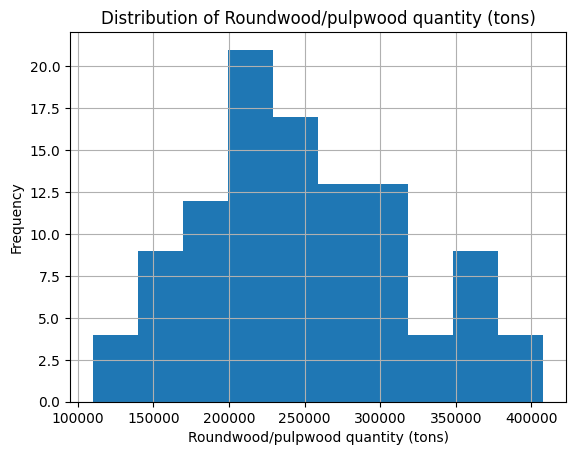

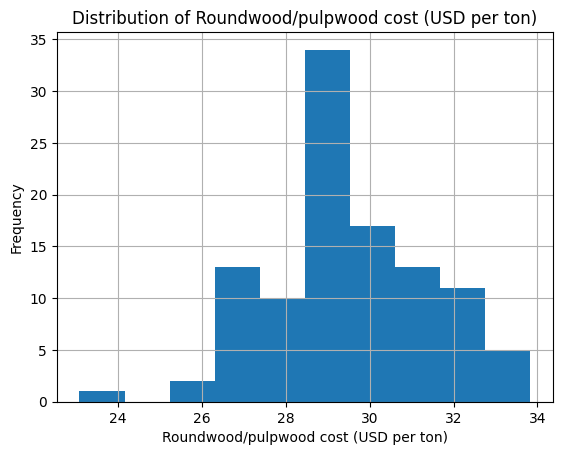

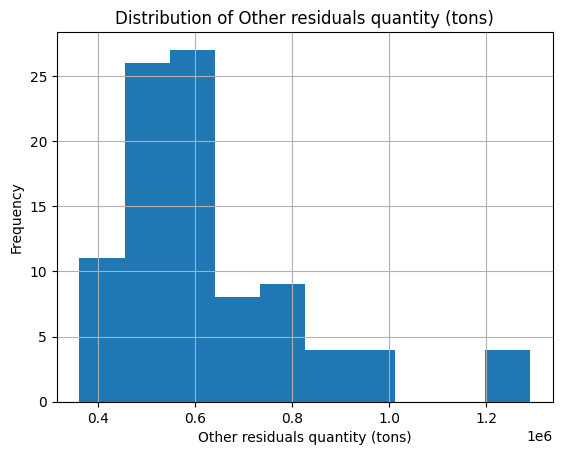

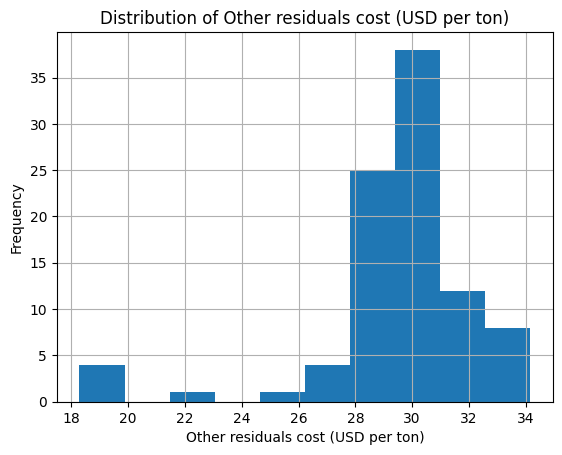

In [50]:
# Generating histograms to display the distributions of the data in each of the columns in which there are missing values
for col in ['Roundwood/pulpwood quantity (tons)',
            'Roundwood/pulpwood cost (USD per ton)',
            'Other residuals quantity (tons)',
            'Other residuals cost (USD per ton)']:
    feedstock_df[col].hist()
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

The distributions of most of these columns are skewed, so the best option to handle the missing values without dropping rows is imputing with the median value of each column (rather than the mean, which is more sensitive to extreme values).

In [51]:
# Imputing missing values with the median of each column
for col in feedstock_df.columns:
    feedstock_df[col] = feedstock_df[col].fillna(feedstock_df[col].median())

# Re-inspecting the number of missing values in each column, as well as the data types of each column
feedstock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 10 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Month                                                    107 non-null    int64  
 1   Roundwood/pulpwood quantity (tons)                       107 non-null    float64
 2   Roundwood/pulpwood cost (USD per ton)                    107 non-null    float64
 3   Sawmill residuals quantity (tons)                        107 non-null    int64  
 4   Sawmill residuals cost (USD per ton)                     107 non-null    float64
 5   Wood product manufacturing residuals quantity (tons)     107 non-null    int64  
 6   Wood product manufacturing residuals cost (USD per ton)  107 non-null    float64
 7   Other residuals quantity (tons)                          107 non-null    float64
 8   Other residuals cost (USD per 

In [52]:
# Converting the columns related to feedstock quantity to integer data types
for col in ['Roundwood/pulpwood quantity (tons)', 'Other residuals quantity (tons)']:
    feedstock_df[col] = feedstock_df[col].astype('int')
feedstock_df.head()

,Month,Roundwood/pulpwood quantity (tons),Roundwood/pulpwood cost (USD per ton),Sawmill residuals quantity (tons),Sawmill residuals cost (USD per ton),Wood product manufacturing residuals quantity (tons),Wood product manufacturing residuals cost (USD per ton),Other residuals quantity (tons),Other residuals cost (USD per ton),Year
0,1,152775,27.04,280632,36.16,127887,42.31,746574,31.72,2016
1,2,192635,29.18,183580,36.39,141275,39.03,443707,32.13,2016
2,3,117841,28.96,155382,35.80,161801,37.28,590026,31.89,2016
3,4,148456,23.09,197395,34.25,120862,38.19,509061,31.52,2016
4,5,206843,32.25,163278,33.66,120371,40.39,484391,31.52,2016


#### Domestic sales and average prices of densified biomass fuel

In [53]:
# Loading the domestic sales and average fuel prices data from 2016 to 2024 into one combined DataFrame
domestic_sales_data = []
for year in range(2016, 2025):
    df = pd.read_excel(f'EIA_MDBFR_{year}.xlsx', sheet_name='Table_7')
    df['Year'] = pd.Series([year] * len(df))
    domestic_sales_data.append(df)

domestic_sales_df = pd.concat(domestic_sales_data, ignore_index=True)
domestic_sales_df.head()

,Region,Month,Quantity (tons),Average Price (USD per ton),Year
0,East,1,39424,184.18,2016
1,East,2,31641,180.77,2016
2,East,3,23817,177.20,2016
3,East,4,36957,173.11,2016
4,East,5,42635,175.81,2016


In [54]:
# Indicating the commodity in the names of the numeric columns to help distinguish this data from the feedstock data (which contains columns for various commodities)
    # The commodity of this dataset is Densified Biomass Fuel (DBF)
domestic_sales_df.rename(columns={'Quantity (tons)': 'DBF Quantity (tons)',
                                  'Average Price (USD per ton)': 'DBF Average Price (USD per ton)'},
                         inplace=True)
domestic_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Region                           428 non-null    object 
 1   Month                            428 non-null    int64  
 2   DBF Quantity (tons)              428 non-null    int64  
 3   DBF Average Price (USD per ton)  428 non-null    float64
 4   Year                             428 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 16.8+ KB


In [55]:
# Checking for "W" (missing) values
len(domestic_sales_df.iloc[np.where(domestic_sales_df == 'W')])

0

#### Export sales and average prices of densified biomass fuel

In [56]:
# Loading the export sales/prices data from 2016 to 2024 into one combined DataFrame
export_sales_data = []
for year in range(2016, 2025):
    df = pd.read_excel(f'EIA_MDBFR_{year}.xlsx', sheet_name='Table_8')
    df['Year'] = pd.Series([year] * len(df))
    export_sales_data.append(df)

export_sales_df = pd.concat(export_sales_data, ignore_index=True)
export_sales_df.head()

,Month,Quantity (tons),Average Price (USD per ton),Year
0,1,318480,151.07,2016
1,2,432018,145.75,2016
2,3,459937,148.58,2016
3,4,317594,155.75,2016
4,5,417765,148.33,2016


In [57]:
# Indicating the commodity (Densified Biomass Fuel) in the names of the numeric columns
export_sales_df.rename(columns={'Quantity (tons)': 'DBF Quantity (tons)',
                                  'Average Price (USD per ton)': 'DBF Average Price (USD per ton)'},
                         inplace=True)
export_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Month                            107 non-null    int64  
 1   DBF Quantity (tons)              107 non-null    int64  
 2   DBF Average Price (USD per ton)  107 non-null    float64
 3   Year                             107 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.5 KB


In [58]:
# Checking for "W" (missing) values
len(export_sales_df.iloc[np.where(export_sales_df == 'W')])

0

#### Merging the Datasets

In [59]:
# Previewing each DataFrame for reference before merging
print('Feedstock Quantities and Manufacturing Costs')
display(feedstock_df.head())

# Since 2 of the 3 DataFrames contain data only at the national scale, the domestic sales data must be filtered for U.S. totals
us_total_domestic_sales_df = domestic_sales_df[domestic_sales_df['Region'] == 'U.S. Total'].drop('Region', axis=1)
print('\nDomestic Sales and Average Fuel Prices')
display(us_total_domestic_sales_df.head())

print('\nExport Sales and Average Fuel Prices')
display(export_sales_df.head())

Feedstock Quantities and Manufacturing Costs


,Month,Roundwood/pulpwood quantity (tons),Roundwood/pulpwood cost (USD per ton),Sawmill residuals quantity (tons),Sawmill residuals cost (USD per ton),Wood product manufacturing residuals quantity (tons),Wood product manufacturing residuals cost (USD per ton),Other residuals quantity (tons),Other residuals cost (USD per ton),Year
0,1,152775,27.04,280632,36.16,127887,42.31,746574,31.72,2016
1,2,192635,29.18,183580,36.39,141275,39.03,443707,32.13,2016
2,3,117841,28.96,155382,35.80,161801,37.28,590026,31.89,2016
3,4,148456,23.09,197395,34.25,120862,38.19,509061,31.52,2016
4,5,206843,32.25,163278,33.66,120371,40.39,484391,31.52,2016



Domestic Sales and Average Fuel Prices


,Month,DBF Quantity (tons),DBF Average Price (USD per ton),Year
36,1,139893,162.25,2016
37,2,90848,160.49,2016
38,3,61153,157.18,2016
39,4,72734,156.02,2016
40,5,81223,156.97,2016



Export Sales and Average Fuel Prices


,Month,DBF Quantity (tons),DBF Average Price (USD per ton),Year
0,1,318480,151.07,2016
1,2,432018,145.75,2016
2,3,459937,148.58,2016
3,4,317594,155.75,2016
4,5,417765,148.33,2016


In [60]:
# Cleaning the columns names in each DataFrame so that suffixes can provide clear distinctions when the DFs are merged
for df in [feedstock_df, us_total_domestic_sales_df, export_sales_df]:
    cleaned_columns = []
    for col in df:
        new_col = col.lower().replace(' ', '_')
        cleaned_columns.append(new_col)
    df.columns = cleaned_columns

    # Reording the columns so that the `year` column appears first (since it is the main categorical variable)
    df = df.reindex([df.columns[-1]] + list(df.columns[:-1]), axis=1)
    print(df.columns)

Index(['year', 'month', 'roundwood/pulpwood_quantity_(tons)',
       'roundwood/pulpwood_cost_(usd_per_ton)',
       'sawmill_residuals_quantity_(tons)',
       'sawmill_residuals_cost_(usd_per_ton)',
       'wood_product_manufacturing_residuals_quantity_(tons)',
       'wood_product_manufacturing_residuals_cost_(usd_per_ton)',
       'other_residuals_quantity_(tons)',
       'other_residuals_cost_(usd_per_ton)'],
      dtype='object')
Index(['year', 'month', 'dbf_quantity_(tons)',
       'dbf_average_price_(usd_per_ton)'],
      dtype='object')
Index(['year', 'month', 'dbf_quantity_(tons)',
       'dbf_average_price_(usd_per_ton)'],
      dtype='object')


In [61]:
# Merging all 3 DFs (first the domestic and export sales data, then the feedstock data)
sales_df = us_total_domestic_sales_df.merge(export_sales_df, on=['year', 'month'], suffixes=('_domestic', '_export')) # adding suffixes to differentiate between domestic/export
mdbfr_complete = feedstock_df.merge(sales_df, on=['year', 'month'])
mdbfr_complete

,month,roundwood/pulpwood_quantity_(tons),roundwood/pulpwood_cost_(usd_per_ton),sawmill_residuals_quantity_(tons),sawmill_residuals_cost_(usd_per_ton),wood_product_manufacturing_residuals_quantity_(tons),wood_product_manufacturing_residuals_cost_(usd_per_ton),other_residuals_quantity_(tons),other_residuals_cost_(usd_per_ton),year,dbf_quantity_(tons)_domestic,dbf_average_price_(usd_per_ton)_domestic,dbf_quantity_(tons)_export,dbf_average_price_(usd_per_ton)_export
0,1,152775,27.04,280632,36.16,127887,42.31,746574,31.72,2016,139893,162.25,318480,151.07
1,2,192635,29.18,183580,36.39,141275,39.03,443707,32.13,2016,90848,160.49,432018,145.75
2,3,117841,28.96,155382,35.80,161801,37.28,590026,31.89,2016,61153,157.18,459937,148.58
3,4,148456,23.09,197395,34.25,120862,38.19,509061,31.52,2016,72734,156.02,317594,155.75
4,5,206843,32.25,163278,33.66,120371,40.39,484391,31.52,2016,81223,156.97,417765,148.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,7,213056,27.71,551293,36.30,12664,43.52,792932,28.67,2024,111457,216.96,826189,183.46
103,8,169303,26.70,620781,37.59,20988,42.34,923150,27.98,2024,155479,229.48,739552,187.41
104,9,124429,27.52,572647,36.61,22376,49.33,877737,29.49,2024,167961,231.99,738479,198.67
105,10,209821,27.53,715850,35.75,24331,47.73,936489,28.90,2024,198453,236.05,757813,204.22


## Exploratory Data Analysis

### Infrastructure

In [98]:
# Previewing the cleaned EIA Construction Cost dataset
generators_df.head()

,Energy Source,Total Capacity (MW),Average New Capacity (MW),Total Number of Plants,Total Number of Generators,Year,Total Construction Cost ($),Average Construction Cost ($/MW)
0,Natural gas,7411.0,176.452381,42,86,2013,7.152477e+09,9.651163e+05
1,Solar,2633.6,13.102488,201,250,2013,9.756707e+09,3.704703e+06
2,Wind,859.1,57.273333,15,22,2013,1.628190e+09,1.895227e+06
3,Biomass,799.6,12.692063,63,105,2013,2.794510e+09,3.494885e+06
4,Hydro,423.7,22.300000,19,21,2013,9.721752e+08,2.294489e+06


In [99]:
# Displaying the unique energy sources and their number of occurences in the dataset
generators_df['Energy Source'].value_counts()

,count
Energy Source,
Natural gas,10
Solar,10
Wind,10
Petroleum liquids,10
Biomass,8
Battery storage,8
Hydro,5
Geothermal,1


In [100]:
# Creating a new DataFrame that excludes geothermal energy data due to lack of observations for reliable comparisons/insights
geo = generators_df[generators_df['Energy Source'] == 'Geothermal']
generators_df_no_geo = generators_df.drop(geo.index)

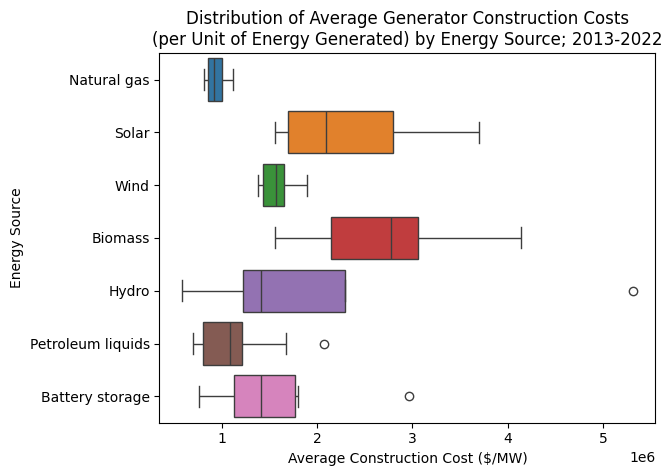

In [433]:
# Creating a boxplot showing the distribution of average construction costs by energy source
sns.boxplot(data=generators_df_no_geo, # excluding Geothermal from sources due to low data availability
            y='Energy Source',
            x='Average Construction Cost ($/MW)',
            hue='Energy Source')
plt.title('Distribution of Average Generator Construction Costs\n(per Unit of Energy Generated) by Energy Source; 2013-2022')
plt.show()

**Observations and Insights:**
* Biomass shows the widest cost range (1.5M - 4M $/MW).

* Natural gas is the most cost-consistent and lowest on average, tightly clustered between 800k - 1.1M $/MW.

* Petroleum shows moderate variability, with most costs falling around the 800k - 1.1M $/MW range and one project exceeding 2M dollars per megawatt.

* These results highlight the economic uncertainty and variability surrounding biomass projects compared to the consistent affordability of fossil fuel (e.g., natural gas) infrastructure.



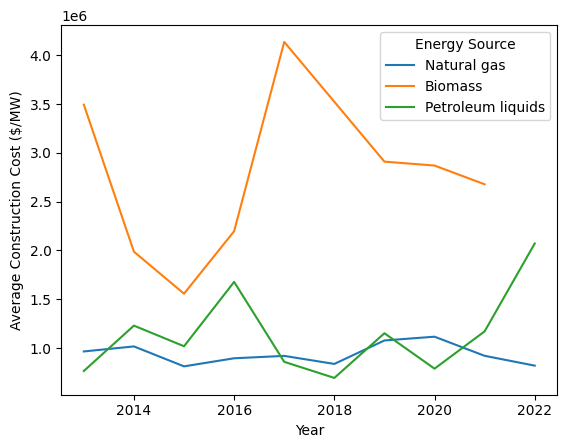

In [95]:
#@title Ongoing EDA
sources_of_interest = ['Natural gas', 'Petroleum liquids', 'Biomass']
sns.lineplot(data=generators_df[generators_df['Energy Source'].isin(sources_of_interest)],
             x='Year',
             y='Average Construction Cost ($/MW)',
             hue='Energy Source')
plt.show()

,Total Capacity (MW),Average New Capacity (MW),Total Number of Plants,Total Number of Generators,Total Construction Cost ($),Average Construction Cost ($/MW)
Total Capacity (MW),1.000000,0.757792,0.391740,0.424576,0.908381,-0.255144
Average New Capacity (MW),0.757792,1.000000,-0.170413,-0.098286,0.478938,-0.345300
Total Number of Plants,0.391740,-0.170413,1.000000,0.987293,0.629352,0.160725
Total Number of Generators,0.424576,-0.098286,0.987293,1.000000,0.637865,0.153677
Total Construction Cost ($),0.908381,0.478938,0.629352,0.637865,1.000000,-0.035631
Average Construction Cost ($/MW),-0.255144,-0.345300,0.160725,0.153677,-0.035631,1.000000


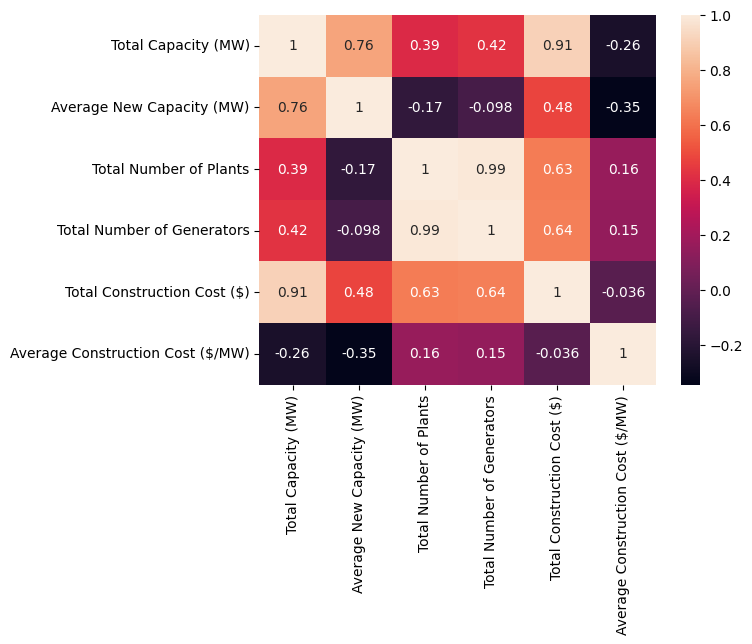

In [97]:
# @title Ongoing EDA
generators_data_corr = generators_df[generators_df.columns[1:]].corr().drop('Year', axis=1).drop('Year')
display(generators_data_corr)

sns.heatmap(generators_data_corr, annot=True)
plt.show()

### Emissions

In [101]:
# Displaying summary statistics for each fuel type's emission values
for fuel in emissions_by_fuel['Fuel Type'].unique():
    print(f'\nFuel Type: {fuel}')
    display(emissions_by_fuel[emissions_by_fuel['Fuel Type'] == fuel]['Emissions (MTCO2e)'].describe())


Fuel Type: Natural Gas


,Emissions (MTCO2e)
count,371930.000000
mean,31.329807
std,91.267715
min,0.000000
25%,0.298000
50%,4.000000
75%,20.500000
max,14602.000000



Fuel Type: Petroleum


,Emissions (MTCO2e)
count,171718.000000
mean,13.173871
std,138.545239
min,0.000000
25%,0.000000
50%,0.000000
75%,0.750000
max,12852.740000



Fuel Type: Biomass


,Emissions (MTCO2e)
count,27528.000000
mean,874.496852
std,1731.442340
min,0.000000
25%,7.450000
50%,85.504097
75%,957.044000
max,20776.560000



Fuel Type: Coal


,Emissions (MTCO2e)
count,31816.000000
mean,3788.780981
std,6237.678777
min,0.000000
25%,98.340000
50%,602.258000
75%,5161.457500
max,141043.400000



Fuel Type: Fuel Gas


,Emissions (MTCO2e)
count,42490.000000
mean,219.546635
std,569.675308
min,0.000000
25%,15.500000
50%,65.858000
75%,199.362000
max,12533.880000


These summary statistics indicate that the emission values for each fuel type are widely dispersed (as reflected by the high standard deviations) and have right-skewed distributions. Thus, a log scale will be applied when visualizing emissions data to allow for more visually comprehensive comparisons between fuel types. Also, for the same reason, emissions values will likely need to undergo a logarithmic transformation later in the project prior to statistical modeling to account for the skewness in the data.

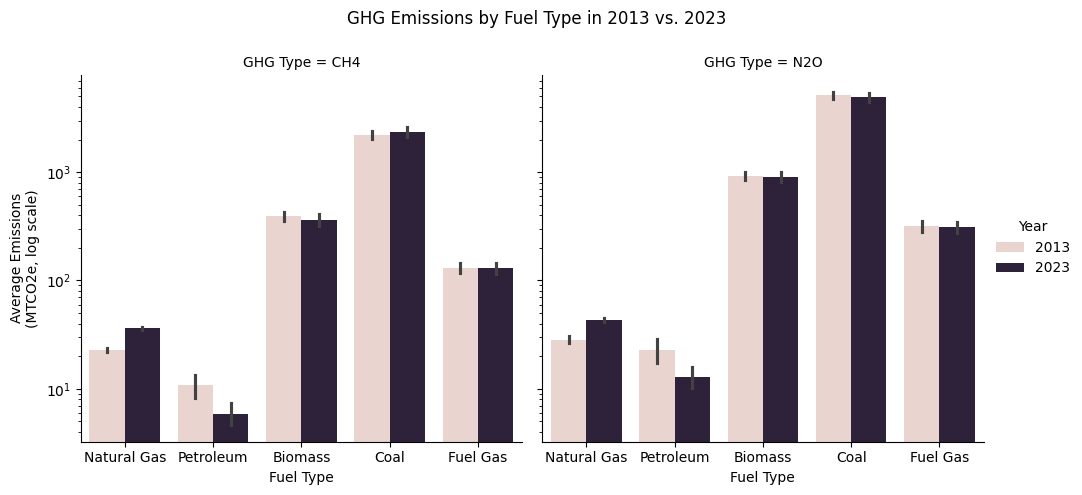

In [102]:
# Creating a grouped bar chart comparing greenhouse gas emissions by fuel and GHG type in 2013 vs. 2023
g = sns.catplot(data=emissions_by_fuel[emissions_by_fuel['Year'].isin([2013, 2023])],
            kind='bar',
            x='Fuel Type',
            y='Emissions (MTCO2e)',
            hue='Year',
            col='GHG Type')
g.set(yscale='log') # Applying log scale to the y-axis
g.set_ylabels('Average Emissions\n(MTCO2e, log scale)')
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('GHG Emissions by Fuel Type in 2013 vs. 2023')
plt.show()

**Observations and Insights:**
* Coal continues to dominate in emissions output for both CH4 (methane) and N2O (nitrous oxide) greenhouse gas types by a large margin — over 1,000 times more than natural gas in some cases.
* Biomass emissions remain moderate and relatively stable, showing little change over the 10-year span.
* Natural gas and petroleum are consistently on the lower-emission end.
* Early trends suggest that while biomass does emit GHGs, it may be less carbon-intensive than coal and comparable to other fossil fuel sources.

### Electricity Generation

In [103]:
# Previewing the most updated version of the DataFrame
elec_gen_all.head()

,Year,Source,Electricity Generation
0,2014,Coal,1581710
1,2015,Coal,1352398
2,2016,Coal,1239149
3,2017,Coal,1205835
4,2018,Coal,1149487


In [104]:
# Creating a new DataFrame that sorts the rows of the original DF by ascending order of year
elec_gen_all_sorted = elec_gen_all.sort_values(by='Year')
elec_gen_all_sorted

,Year,Source,Electricity Generation
0,2014,Coal,1581710
10,2014,Natural Gas,1126635
30,2014,Nuclear,797166
20,2014,Other Fossil Gas,12022
50,2014,Solar,17691
...,...,...,...
109,2023,Biogenic Municipal Solid Waste,5568
99,2023,Landfill Gas,7935
129,2023,Geothermal,16367
139,2023,All Fossil Fuels,2509189


Made the decision to analyze percent change rather than absolute change in electricity generation over time due to magnitude differences between values for biomass and fossil fuels. This is intended to make trends more visually comparable and intuitive, focusing more on relative growth dynamics instead raw generation.

In [105]:
# Adding a column that stores the electricity generation value for each source relative to the source's generation in 2014 (expressed as a percentage)
elec_gen_all_sorted['% of 2014 Generation'] = elec_gen_all_sorted.groupby('Source')['Electricity Generation'].transform(lambda x: (x / x.iloc[0]) * 100)
elec_gen_all_sorted[elec_gen_all_sorted['Source'] == 'Coal']

,Year,Source,Electricity Generation,% of 2014 Generation
0,2014,Coal,1581710,100.000000
1,2015,Coal,1352398,85.502273
2,2016,Coal,1239149,78.342364
3,2017,Coal,1205835,76.236162
4,2018,Coal,1149487,72.673689
5,2019,Coal,964957,61.007201
6,2020,Coal,773393,48.896005
7,2021,Coal,897999,56.773935
8,2022,Coal,831512,52.570446
9,2023,Coal,675115,42.682603


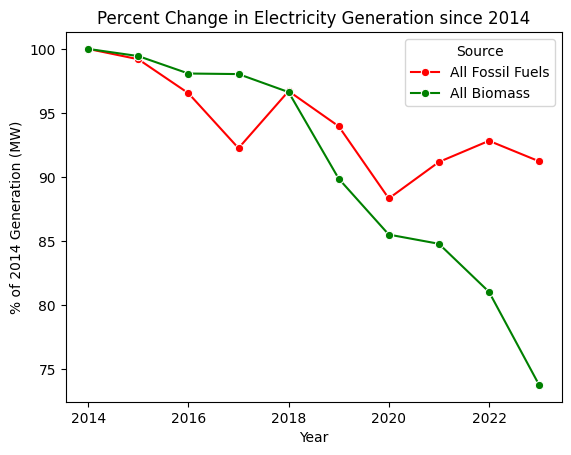

In [106]:
# Creating a lineplot of percent change in electricity generation since 2014 for biomass vs. fossil fuels
sns.lineplot(data=elec_gen_all_sorted[elec_gen_all_sorted['Source'].isin(['All Biomass', 'All Fossil Fuels'])],
             x='Year',
             y='% of 2014 Generation',
             hue='Source',
             marker='o',
             palette=['red', 'green'])
plt.ylabel('% of 2014 Generation (MW)')
plt.title('Percent Change in Electricity Generation since 2014')
plt.show()

**Observations and Insights:**
* Biomass electricity generation has declined by about 26% over the last 10 years, indicating potential stagnation.
* Fossil fuel generation has also declined but at a slower rate (~ 9% drop), possibly offset by the growing use of renewables.
* These trends suggest potential challenges in bioenergy expansion and aligns with cost variability noted in the infrastructure EDA.

### Feedstock Consumption and Efficiency

### Costs/Pricing